# Основные концепции Machine Learning. Домашняя работа

В этом домашнем задании вам нужно запустить алгоритмы, приведенные в файлах Jupyter Notebook, используя датасет: 1.8_phones.csv. <br>
В рамках
- Для задачи регрессии нужно предсказать цену телефона,
- для классификации - операционную систему или год выпуска устройства.
- Для задачи кластеризации необходимо запустить алгоритм кластеризации, в котором количество кластеров и признаки можете выбрать на свое усмотрение.

In [55]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #для отрисовки 3D проекции

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [56]:
phones = pd.read_csv("../../../../Data/sb/1.8_phones.csv")
phones.head(10)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015
7,64,Android,4277,2013
8,512,iOS,12797,2015
9,64,Android,6256,2015


In [57]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###

Задание 1: обучить модель регрессии

In [58]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
# X = phones[["disk", "os", "year"]]
X = phones[["disk", "year"]]
y = phones["price"]

In [59]:
model = LinearRegression().fit(X, y)

In [60]:
model.predict(X[99:100])[0], y[99]

(8412.619474231033, 9533)

Задание 2: обучить модель классификации

In [66]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[["disk", "year"]]
y = phones["os"]

In [68]:
model = DecisionTreeClassifier().fit(X, y)

In [71]:
model.predict(X[5:6])[0], y[5]

('iOS', 'iOS')

Задание 3: обучить модель кластеризации

In [77]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[["disk", "price", "year"]]

In [78]:
model = KMeans(n_clusters=4).fit(X)

In [84]:
# смотрим центры кластеров
[c1, c2, c3, c4] = model.cluster_centers_

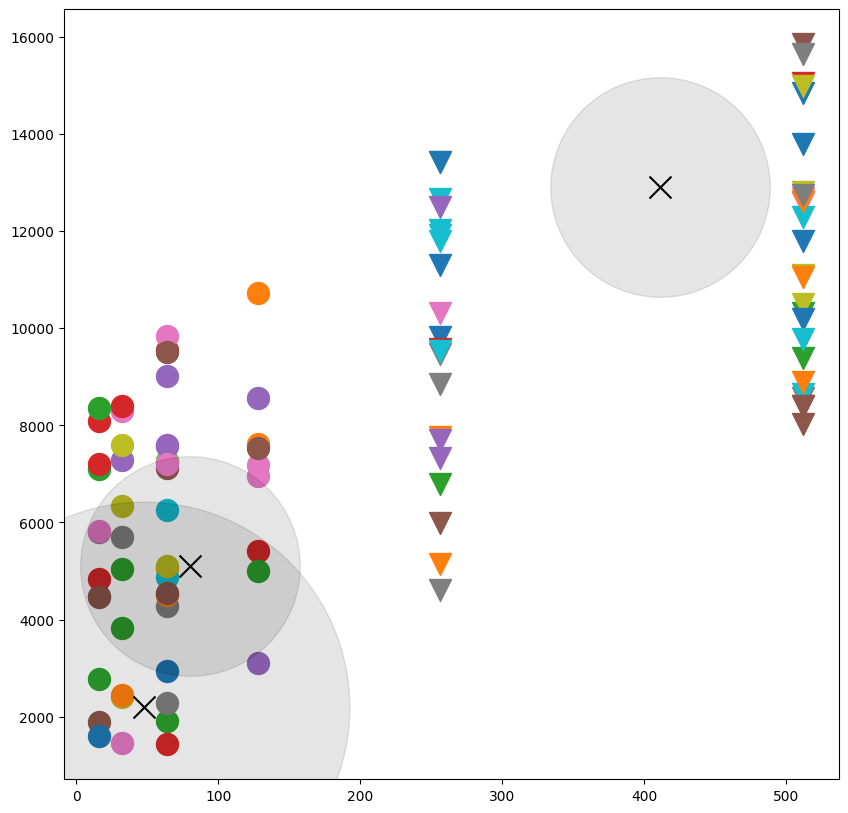

In [85]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "v", "disk": "*"}
for d1, d2, l in zip(phones.disk, phones.price, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

# добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c3[0], c3[1], s=250, marker="x", c="black")
plt.scatter(c3[0], c3[1], s=250 * 3.5e2, c="black", alpha=0.1)

# отображаем картинку
plt.show()